In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv("data/April9_kate_good_leads.txt", sep=' ')

In [41]:
df["date"] = pd.to_datetime(df["time"], unit="ms")

In [42]:
df.head()

,time,datetime,intensity,date
0,1554844027892,20190409_14:07:07.892,-0.002274,2019-04-09 21:07:07.892
1,1554844027916,20190409_14:07:07.916,-0.004622,2019-04-09 21:07:07.916
2,1554844027937,20190409_14:07:07.937,-0.006620,2019-04-09 21:07:07.937
3,1554844027948,20190409_14:07:07.948,-0.008107,2019-04-09 21:07:07.948
4,1554844027964,20190409_14:07:07.964,-0.009094,2019-04-09 21:07:07.964


In [43]:
dft = df[["intensity", "date"]].set_index('date')

In [44]:
dft.head()

,intensity
date,
2019-04-09 21:07:07.892,-0.002274
2019-04-09 21:07:07.916,-0.004622
2019-04-09 21:07:07.937,-0.006620
2019-04-09 21:07:07.948,-0.008107
2019-04-09 21:07:07.964,-0.009094


In [45]:
type(dft.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [46]:
dft["rolling_mean"] = dft["intensity"].rolling("400ms", min_periods=1).mean()

In [47]:
dft["rolling_mean"].isnull().values.any()

False

In [48]:
dft.head()

,intensity,rolling_mean
date,,
2019-04-09 21:07:07.892,-0.002274,-0.002274
2019-04-09 21:07:07.916,-0.004622,-0.003448
2019-04-09 21:07:07.937,-0.006620,-0.004505
2019-04-09 21:07:07.948,-0.008107,-0.005406
2019-04-09 21:07:07.964,-0.009094,-0.006143


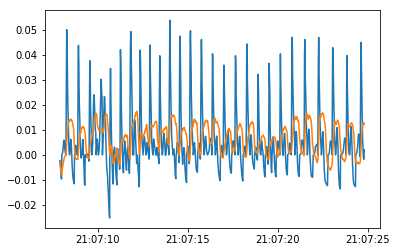

In [49]:
plt.plot(dft.index[:1000], dft["intensity"][:1000])
#plt.plot(dft.index[:1000], dft["rolling_mean"][:1000])
plt.plot(dft.index[:1000], 1.2*dft["rolling_mean"][:1000])

plt.show()

In [50]:
mov_avg = dft["rolling_mean"]
avg_hr = (np.mean(dft.intensity))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
mov_avg = [x*1.2 for x in mov_avg]

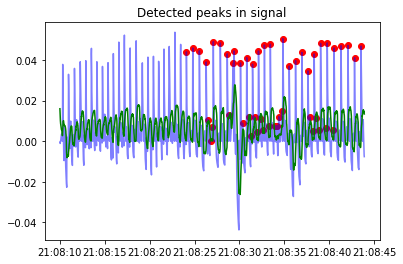

In [58]:
#Mark regions of interest
window = []
peak_list = []
listpos = 10 #We use a counter to move over the different data columns
for datapoint in dft.intensity[10:]:
    #import pdb; pdb.set_trace()
    rolling_mean = dft.rolling_mean[listpos] #Get local mean
    if (datapoint < rolling_mean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
        listpos += 1
    elif (datapoint > rolling_mean): #If signal comes above local mean, mark ROI
        window.append(datapoint)
        listpos += 1
    else: #If signal drops below local mean -> determine highest point
        #import pdb; pdb.set_trace()
        maximum = 0
        try:
            maximum = max(window)
        except:
            print("No peak detection at %d" % listpos)
            #import pdb; pdb.set_trace()
        beat_position = listpos - len(window) + (window.index(maximum)) #Notate the position of the point on the X-axis
        #import pdb; pdb.set_trace()
        peak_list.append(beat_position) #Add detected peak to list
        window = [] #Clear marked ROI
        listpos += 1
#import pdb; pdb.set_trace()
ybeat = [dft.intensity[x] for x in peak_list] #Get the y-value of all peaks for plotting purposes
plt.title("Detected peaks in signal")
#plt.xlim(0,2500)
plt.plot(dft.index[-2000:], dft.intensity[-2000:], alpha=0.5, color='blue') #Plot semi-transparent HR
plt.plot(dft.index[-2000:], mov_avg[-2000:], color ='green') #Plot moving average
peak_time = dft.index[peak_list]
#import pdb; pdb.set_trace()

plt.scatter(peak_time[-50:], ybeat[-50:], color='red') #Plot detected peaks
plt.show()

In [63]:
l = np.asarray(ybeat)
l[np.where(l > 0.04)]

array([0.04993652, 0.04369141, 0.0419397 , 0.04923218, 0.0418042 ,
       0.04382813, 0.05370605, 0.04734863, 0.04949585, 0.0460498 ,
       0.04034668, 0.04425171, 0.04029297, 0.04689453, 0.04602173,
       0.04685791, 0.0427771 , 0.04486938, 0.04241821, 0.04494507,
       0.04013306, 0.04649048, 0.04183838, 0.04127319, 0.04558228,
       0.04943726, 0.0505127 , 0.0436145 , 0.04608521, 0.04374023,
       0.0404834 , 0.04509155, 0.04443115, 0.04517334, 0.04599365,
       0.04276611, 0.04665527, 0.04246094, 0.04632812, 0.04309326,
       0.04188232, 0.04296631, 0.04466797, 0.0522998 , 0.04637085,
       0.04805786, 0.04522705, 0.04455933, 0.04390869, 0.04946045,
       0.05007813, 0.0478772 , 0.04646362, 0.04448853, 0.0421521 ,
       0.04082764, 0.0457019 , 0.04791504, 0.04815918, 0.04279053,
       0.04309814, 0.04120728, 0.04693237, 0.04775269, 0.04293945,
       0.04573364, 0.04313599, 0.04880249, 0.05223755, 0.04590942,
       0.04943359, 0.04140015, 0.04179565, 0.04536987, 0.04666

In [68]:
l2 = np.asarray(dft.intensity)
l2[np.where(l2 > 0.04)]

array([0.04993652, 0.04316406, 0.04369141, 0.0419397 , 0.0409729 ,
       0.04923218, 0.04396362, 0.0418042 , 0.04382813, 0.04414307,
       0.05370605, 0.04608521, 0.04734863, 0.04355591, 0.04692505,
       0.04949585, 0.04123657, 0.0450647 , 0.0460498 , 0.04034668,
       0.04425171, 0.04029297, 0.04689453, 0.04021973, 0.04602173,
       0.04685791, 0.04023071, 0.0427771 , 0.04120728, 0.04486938,
       0.04094727, 0.04241821, 0.04296143, 0.04494507, 0.04013306,
       0.04649048, 0.04168457, 0.04183838, 0.04127319, 0.04290527,
       0.04558228, 0.04192139, 0.04943726, 0.04242065, 0.04226074,
       0.0505127 , 0.04327881, 0.0436145 , 0.04148315, 0.04608521,
       0.04132202, 0.04374023, 0.0404834 , 0.04509155, 0.04443115,
       0.04089478, 0.04517334, 0.04203979, 0.04407837, 0.04599365,
       0.04276611, 0.04195435, 0.04665527, 0.04088867, 0.04184692,
       0.04246094, 0.04451904, 0.04632812, 0.04309326, 0.04203979,
       0.04188232, 0.04296631, 0.04086914, 0.04466797, 0.04097